<div style="border:solid Chocolate 2px; padding: 40px">

<b> Айдар, привет!👋</b>

Меня зовут Алексей Гриб, я буду твоим ментором на протяжении финального спринта:)

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам аналитика. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

Я не смогу принять проект, если в нём будет хотя бы одна критичная ошибка или несколько некритичных ошибок - тогда проект нужно будет немного доработать. Но это нестрашно - я обязательно дам тебе подсказку или укажу верное направление.
    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<div class="alert alert-danger"> В ноутбуке ни одного комментария от ревьюера, хотя проект числится как проверенный, посылаю проект на проверку ещё раз. </div>


<div style="border:solid Chocolate 2px; padding: 40px">

<b> Комментарий ментора</b>

Да, прошу прощения за заминку - такая же проблема была у ещё одного студента, которому отправлял работу ночью. Наверное, сбой на платформе - дублирую из сохранённой версии.

# Анализ оттока клиентов телекоммуникационной компании "ТелеДом"

Целью данной работы является создание модели предсказывающей отток существующих пользователей в пользу других телекоммуникационных компаний. На основе предсказаний модели абонентам планирующим отказаться от услуг связи будут предложены более выгодные условия отделом маркетинга. В нашем распоряжении данные о выборке клиентов и услугах находящихся в 4х таблицах: 

contract_new.csv — информация о договоре;
personal_new.csv — персональные данные клиента;
internet_new.csv — информация об интернет-услугах;
phone_new.csv    — информация об услугах телефонии.


<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть вступительная часть - отлично!

In [1]:
!pip install --upgrade pip -q
!pip install --upgrade scikit-learn -q
!pip install seaborn -q
!pip install lightgbm -q
!pip install shap -q
!pip install --upgrade shap -q
!pip install phik -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import shap
import phik
from phik import resources, report

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

## Загрузка данных

In [3]:
try:
    contract_new = pd.read_csv('telecom_project/contract_new.csv')
    personal_new = pd.read_csv('telecom_project/personal_new.csv')
    internet_new = pd.read_csv('telecom_project/internet_new.csv')
    phone_new    = pd.read_csv('telecom_project/phone_new.csv')
except FileNotFoundError:
    contract_new = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    personal_new = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    internet_new = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    phone_new    = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные загрузили - отлично!
    
Здорово, что ты используешь конструкцию ``try-except`` для путей файлов. Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

## Исследовательский анализ данных и предобработка данных

In [4]:
display(contract_new.head())
contract_new.info()
print('contract_new shape', contract_new.shape)
display(contract_new.describe())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
contract_new shape (7043, 8)


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Файл __contract_new__, __расшифровка столбцов__:
customerID — идентификатор абонента;
BeginDate — дата начала действия договора;
EndDate — дата окончания действия договора;
Type — тип оплаты: раз в год-два или ежемесячно;
PaperlessBilling — электронный расчётный лист;
PaymentMethod — тип платежа;
MonthlyCharges — расходы за месяц;
TotalCharges — общие расходы абонента.

Из общей информации о датасете видно, что пропущенных значений нет. Также видно, что типы данных для нескольких столбцы определились не правильно, приведём их к соотвествующему виду.

In [5]:
def convert_to_datetime(X):
    X['BeginDate'] = pd.to_datetime(X['BeginDate'], format='%Y-%m-%d')
    X['EndDate'] = pd.to_datetime(X['EndDate'], errors='coerce', format='%Y-%m-%d')
    return X

def convert_to_numeric(X):
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    # Вообще столбец MonthlyCharges нормальный сразу, но для полноты добавим конвертацию
    X['MonthlyCharges'] = pd.to_numeric(X['MonthlyCharges'], errors='coerce')
    return X

pipeline = Pipeline(steps=[
    ('to_datetime', FunctionTransformer(convert_to_datetime)),
    ('to_numeric', FunctionTransformer(convert_to_numeric))
])

contract_new_transformed = pipeline.fit_transform(contract_new)
contract_new_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Типы данных преобразованы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Кодирование нельзя делать руками:
- при появлении новых значений категориальных признаков, не предусмотренных твоим решением, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделаешь частью `pipeline`, а все современные решения базируются на них.
    
Поэтому кодирование нужно делать только с применением обучаемых трансформеров.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил. Плюс добавил конвертацию столбцов про которые забыл.
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Кодирование данных нужно осуществлять только после сплитования - так мы не допускаем утечку данных из тестовой части, а также можем контролировать появление в `test` новых значений категориальных признаков.
    
На этапе EDA готовить данные к машинному обучению не нужно.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

убрал кодирование
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

Из кода выше видно, что в данных образовались пропуски, это столбцы EndDate, где заполнено всего 1101 дат, он же является целевым и столбец TotalCharges в котором не хватает 11 значений. Пропуск в столбце EndDate означает что абонент остаётся с компанией, датами обозначены даты ухода абонентов. Посмотрим на пропущенные значения столбца TotalCharges.

In [6]:
contract_new_transformed[contract_new_transformed.TotalCharges.isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN


~Какой-то четкой связи между записями в таблице не прослеживается, за исключением даты начала действия договора, она у всех абонентов одинаковая. Похоже на какой-то артефакт, не будем разбираться почему так произошло, а просто удалим эти данные, их всего 11 строк.~

In [7]:
# contract_new = contract_new[~contract_new.TotalCharges.isna()]

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Разобраться надо: пропуски описывают один из возможных сценариев поведения клиента, мы должны этот сценарий понять и учесть при разработке модели, потому что он будет возникать и дальше.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил. См. ниже.
</div>


Найдём максимальную дату у всего датасета и вытащим все строки с ней. Сравним индексы у двух датафреймов, увидим что они равны. Вывод: абоненты только подключились и столбец TotalCharges ещё не обновился, возможно он обновиться когда провайдер получит первый платёж от новых абонентов. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> А пока не обновился, чем мы можем их заполнить, чтобы описать состояние, когда деньги не пришли?

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Пусть будет -9
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Это значит, что клиент должен нам 9 условных единиц. Он нам что-то действительно должен, когда пришёл в компанию? Я бы в такую не приходил:) 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Хорошо, пусть будет 0
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

In [8]:
contract_new_transformed.loc[contract_new_transformed.TotalCharges.isna(), 'TotalCharges'] = 0

Посмотрим на графики распределения и гистограммы.

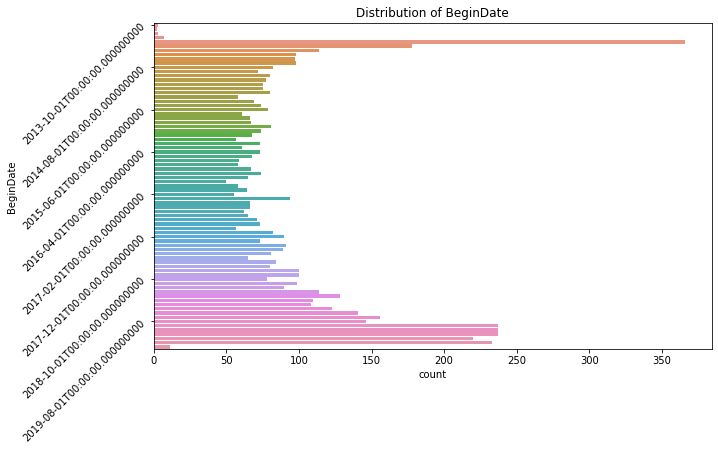

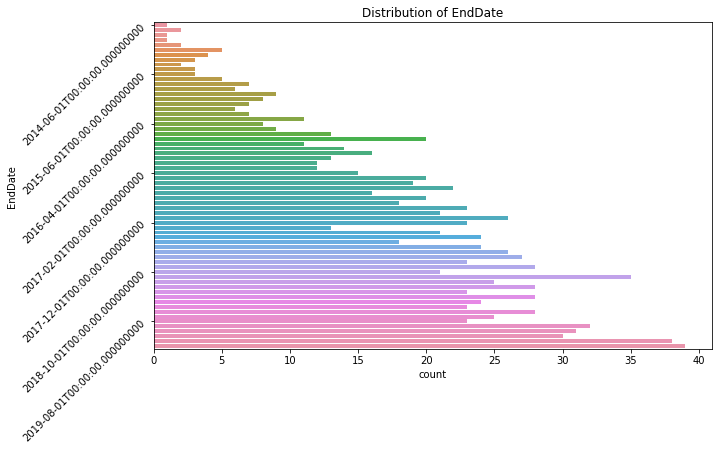

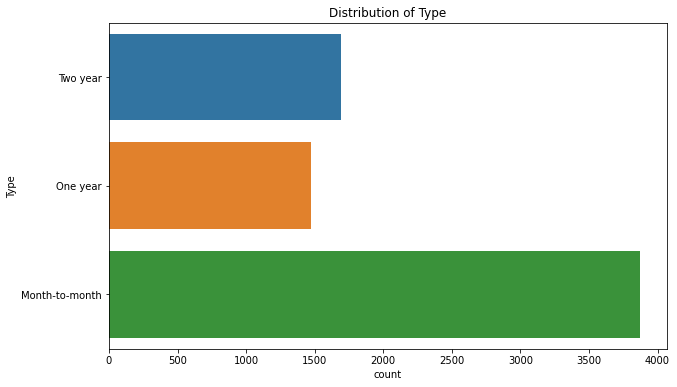

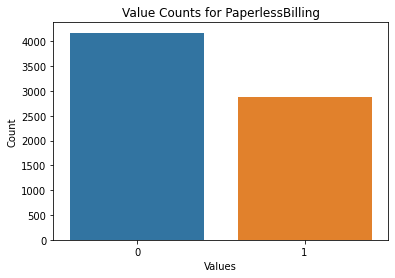

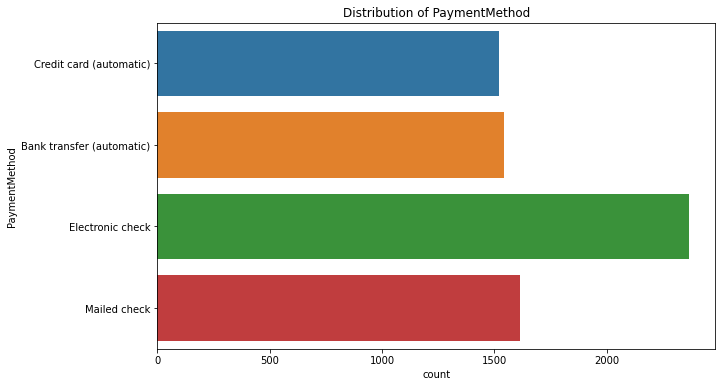

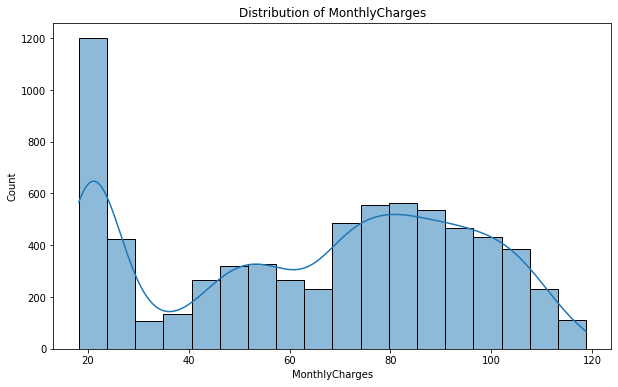

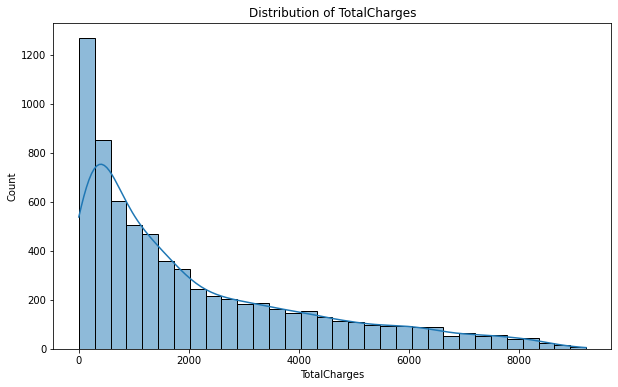

In [9]:
for column in contract_new_transformed.columns:
    if column == 'customerID':
        continue
    if column.startswith('Paperless'):
        sns.countplot(x=contract_new_transformed[column])
        plt.title(f'Value Counts for {column}')
        plt.xlabel('Values')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['0', '1'])
        plt.show()
        continue
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {column}')

    if pd.api.types.is_numeric_dtype(contract_new_transformed[column]):
        sns.histplot(contract_new_transformed[column], kde=True)
    else:
        if 'Date' in column:
            contract_new_transformed = contract_new_transformed.sort_values(column)
            sns.countplot(y=column, data=contract_new_transformed)
            ax = plt.gca()
            ticks = ax.get_yticks()
            tick_labels = ax.get_yticklabels()
            ax.set_yticks(ticks[::10])
            ax.set_yticklabels(tick_labels[::10], rotation=45)
        else:
            sns.countplot(y=column, data=contract_new_transformed)

    plt.show()

Из графиков видно, что у компании были проблемы с привлечением новых абонентов, однако в 2018-2019 годах ситуация исправилась. Одновременно с этим количество уходящих абонентов стабильно растёт. Клиенты предпочитают заключать помесячные контракты, большая часть клиентов предпочитает электронный биллинг. Также большая часть клиентов платят при помощи электронных чеков. Остальные формы платежей находятся на примерно одинаковом уровне. Электронные чеки значительно опережают такие формы платежей как автоматические списания и чеки по почте. Распределения столбцов MonthlyCharges и TotalCharges не нормальные, со значительным перекосом влево. Это показатель того что большинство клиентов платят небольшие суммы.

Рассмотрим следующую таблицу из задания.

In [10]:
display(personal_new.head())
personal_new.info()
print('personal_new shape', personal_new.shape)
display(personal_new.describe())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
personal_new shape (7043, 5)


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Таблица __personal_new__, __описание столбцов__:
customerID — идентификатор пользователя;
gender — пол;
SeniorCitizen — является ли абонент пенсионером;
Partner — есть ли у абонента супруг или супруга;
Dependents — есть ли у абонента дети.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично по ручному кодированию.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично по кодированию до сплитования. EDA проводим на исходных данных.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Удалил кодирование
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

Посмотрим как различаются классы значений.

In [11]:
personal_new

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


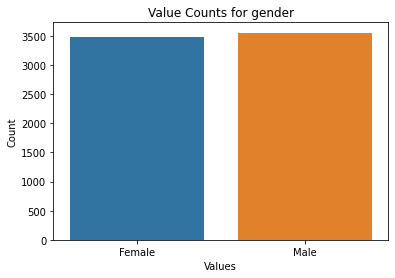

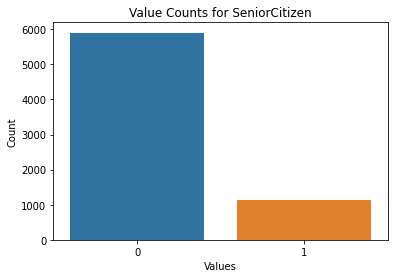

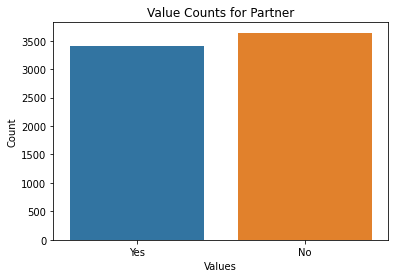

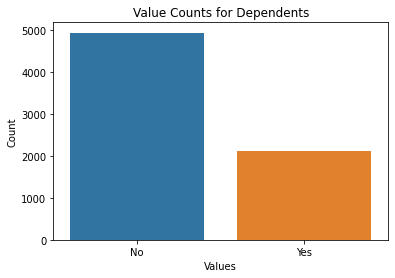

In [12]:
for col in personal_new.columns[1:]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=personal_new[col])
    plt.title(f'Value Counts for {col}')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()

Из графиков видно, что пенсионеров в 6 раз меньше чем обычных абонентов. Количество людей у которых есть партнер немного меньше чем количество холостых. Людей с наличием зависимых от них в 2 раза меньше чем людей свободных от подобных обязанностей. Количество мужчин и женщин примерно одинаково.

Перейдём к таблице __internet_new__, __описание столбцов__:
customerID — идентификатор пользователя;
InternetService — тип подключения;
OnlineSecurity — блокировка опасных сайтов;
OnlineBackup — облачное хранилище файлов для резервного копирования данных;
DeviceProtection — антивирус;
TechSupport — выделенная линия технической поддержки;
StreamingTV — стриминговое телевидение;
StreamingMovies — каталог фильмов.

In [13]:
display(internet_new.head())
internet_new.info()
print('internet_new shape', internet_new.shape)
display(internet_new.describe())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
internet_new shape (5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2832-KJCRD,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично по ручному кодированию.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично по кодированию до сплитования. EDA проводим на исходных данных.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Удалил кодирование
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

Построим столбчатые диаграммы для оценки распределения.

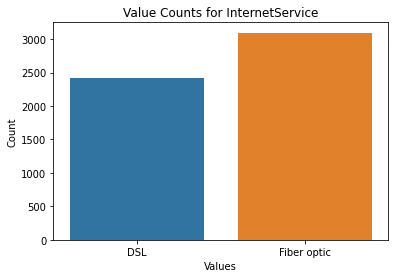

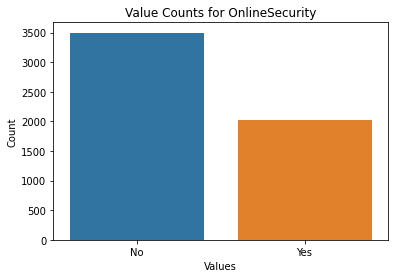

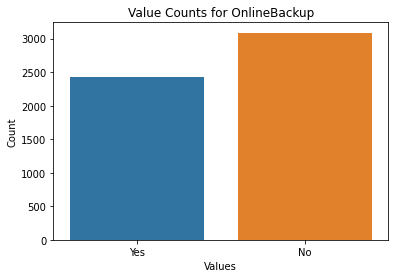

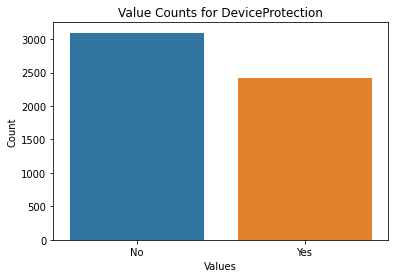

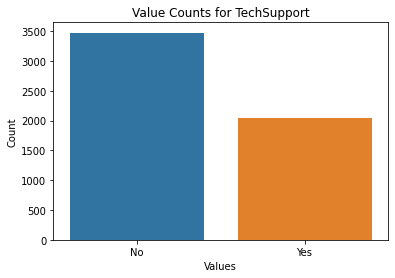

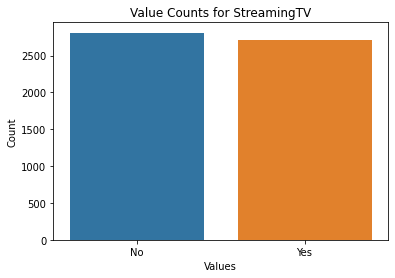

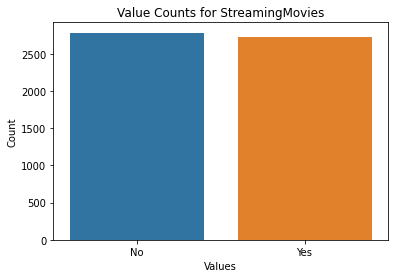

In [14]:
for col in internet_new.columns[1:]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=internet_new[col])
    plt.title(f'Value Counts for {col}')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()

Количество пользователей на оптоволокне больше чем пользователей на DSL. Число людей у которых не установлен блокировщик опасных сайтов значительно больше чем тех у кого установлен. Большая часть людей не пользуется услугами резервного копирования, антивирусом и выделенной линией технической поддержки. Услугами стриминг телевидения и каталогом фильмов пользуется примерно равно количество людей в каждой из групп(тех кто пользуется и не пользуется).

Взглянем на людей которые не пользуются услугами интернета:

In [15]:
test = set(contract_new_transformed.customerID) - set(internet_new.customerID)
contract_new_transformed[contract_new_transformed.customerID.isin(test)]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
269,7014-ZZXAW,2014-03-01,2014-06-01,Two year,Yes,Credit card (automatic),24.25,77.84
2980,5598-IKHQQ,2014-02-01,2015-01-01,Two year,No,Credit card (automatic),25.45,293.95
2524,0784-ZQJZX,2014-02-01,2015-03-01,Two year,No,Credit card (automatic),19.90,258.70
4505,6917-FIJHC,2014-02-01,2015-03-01,Two year,Yes,Mailed check,26.00,341.38
3724,5201-CBWYG,2014-12-01,2015-04-01,One year,No,Bank transfer (automatic),24.80,100.19
...,...,...,...,...,...,...,...,...
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,0.00
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,0.00
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,0.00
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,0.00


Наконец рассмотрим четвёртую таблицу __phone_new__, __описание столбцов__:
customerID — идентификатор пользователя;
MultipleLines — подключение телефона к нескольким линиям одновременно.
Всего один столбец, помимо идентификатора клиента.

In [16]:
display(phone_new.head())
phone_new.info()
print('phone_new shape', phone_new.shape)
display(phone_new.describe())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
phone_new shape (6361, 2)


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,8023-QHAIO,No
freq,1,3390


Пропусков в данных нет.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично по ручному кодированию.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично по кодированию до сплитования. EDA проводим на исходных данных.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Удалил кодирование
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

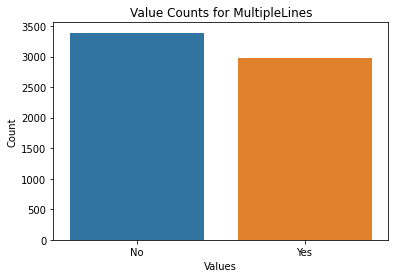

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=phone_new[f'{phone_new.columns[1]}'])
plt.title(f'Value Counts for {phone_new.columns[1]}')
plt.xlabel('Values')
plt.ylabel('Count');

Неожиданно, но количество абонентов у которых подключено несколько линий к одному телефону не сильно меньше чем тех у кого только одна линия на телефоне.

Проверим все таблицы на дубликаты и за одно посмотрим на названия столбцов после перекодирования:

In [18]:
display(contract_new_transformed[contract_new_transformed.duplicated()])
display(personal_new[personal_new.duplicated()])
display(internet_new[internet_new.duplicated()])
display(phone_new[phone_new.duplicated()])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


,customerID,gender,SeniorCitizen,Partner,Dependents


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


,customerID,MultipleLines


Дублей в исходных таблицах нет.

__Вывод__: Данные проверены на наличие дублей и пропущенных значений.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Первичный анализ данных выполнен.

## Объединение данных

In [19]:
merged_df = pd.merge(contract_new_transformed, personal_new, 
                     on='customerID', how='left')
merged_df = pd.merge(merged_df, internet_new, 
                     on='customerID', how='left')
merged_df = pd.merge(merged_df, phone_new, 
                     on='customerID', how='left')
merged_df.shape

(7043, 20)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные соединены корректно.

## Исследовательский анализ и предобработка данных объединённого датафрейма

Рассчитаем процент пропущенных значений по столбцам.

In [20]:
na_percentage = (merged_df.isna().sum() / len(merged_df)) * 100
display(na_percentage[:11])
display(na_percentage[11:])

customerID           0.000000
BeginDate            0.000000
EndDate             84.367457
Type                 0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
dtype: float64

Dependents           0.000000
InternetService     21.666903
OnlineSecurity      21.666903
OnlineBackup        21.666903
DeviceProtection    21.666903
TechSupport         21.666903
StreamingTV         21.666903
StreamingMovies     21.666903
MultipleLines        9.683374
dtype: float64

Есть пропущенные значения в нескольких столбцах: EndDate, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines. Похоже, что основной виновник это таблица internet_new. По столбцу EndDate всё понятно, там пропущенное значение это целевой признак(клиент остался в компании). В таблице phone_new тоже не хватает части данных.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> EDA должен быть выполнен графически после заполнения пропусков, появившихся после слияния. Особенности обработки этих пропусков мы обсуждали на вводном вебинаре.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Обсуждалось только что эти пропуски появятся. Что с ними делать не обсуждалось. Помню я предложил melt, не помню почему именно его, ты сказал что мелт точно нет. На этом всё. Это не обсуждение. ~Мне не очень понятна также ценность графического EDA, учитывая что я для каждого признака построил график на предыдущих этапах обработки и описал его.~ Написал это и понял что интересно было бы ещё посмотреть на распределение нового столбца на основе даты с длительностью, добавил ниже. ~И самое главное для этого проекта я выбрал импутацию по методу К ближайших соседей.~ ~Импутация по KNN сломалась после последних перекодирований столбцов при помощи OHE, я так подозреваю что в некоторых случаях у всех соседей NaN и из-за этого возникает ошибка, пробовал менять гиперпараметр n_neighbors и ещё много чего но безуспешно.~ Для импутации выбрал метод MICE, он тоже ломался как и KNN, но я докапался до сути, дело было в тех записях у которых не был заполнен столбец TotalCharge, соответственно возникла сложность, надо было сделать две операции над столбцом последовательно. Дублирования столбца в трансформерах приводило к странным ошибкам и добавляло ещё один столбец, причем параллельно. Это заняло много времени, но я сделал так в итоге: создал пайплайн где сделал последовательные манипуляции и потом добавил его как трансформер в ColumnTransformer. Что-бы не было утечки данных, в соответствии с планом надо проводить импутацию после разделения данных на тренировочную и тестовую выборки, что означает что каждый признак будет покрыт графиком 3 раза, что я считаю слишком жирным. В этом разделе я ограничился оценкой количества и доли пропущенных значений а также конвертацией столбцов с датами во что-то более полезное с последующим их удалением и удалением столбца с ID.
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> На этапе обсуждения данных мы проговаривали разницу между отсутствием пакета и отсутствием услуги в пределах пакета. Это ключ к заполнению пропусков в этом признаке - кажется, бизнес-модель заказчика не была понята, раз ты ушёл в такие сложные материи. Вернись, пожалуйста, к обсуждению этого момента в записи - EDA признаков мы должны провести уже по данным с заполненными пропусками.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Заполнил пропуски которые получились из-за таблицы internet_new ниже. А также пропуски в столбце multiple lines ниже.
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> EDA признаков обязательно делается после соединения таблиц и заполнения пропусков - см.вводную встречу.
    
Также в функции `fix_the_rest` всё равно происходит смешение `No` как отсутствие услуги и `No` как отсутствие пакета услуг - почему мы тут не можем аналогично использовать замену на `NoService`?

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поменял на NoService
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

In [21]:
def replace_na_in_internet_service(merged_df):
    merged_df.loc[merged_df.InternetService.isna(), 'InternetService'] = 'NoService'
    return merged_df

def fix_the_rest(merged_df):
    merged_df.loc[merged_df.InternetService == 'NoService', 'OnlineSecurity':'StreamingMovies'] = 'NoService'
    return merged_df
    
merged_df = fix_the_rest(replace_na_in_internet_service(merged_df))

Заполняем пропуски в столбце multiple_lines.

In [22]:
for col in merged_df.columns:
    print(merged_df[merged_df.MultipleLines.isna()][col].value_counts())

7758-XKCBS    1
8165-CBKXO    1
0668-OGMHD    1
4837-PZTIC    1
7021-XSNYE    1
             ..
7721-JXEAW    1
2724-FJDYW    1
0121-SNYRK    1
0336-KXKFK    1
8070-AAWZP    1
Name: customerID, Length: 682, dtype: int64
2019-10-01    33
2014-02-01    31
2019-11-01    29
2019-09-01    23
2019-07-01    20
              ..
2016-12-01     2
2020-02-01     2
2015-07-01     2
2014-01-01     1
2017-11-01     1
Name: BeginDate, Length: 74, dtype: int64
2019-09-01    6
2019-12-01    5
2017-06-01    5
2017-11-01    4
2018-11-01    4
2018-08-01    4
2020-01-01    4
2018-09-01    4
2018-12-01    3
2016-10-01    3
2017-10-01    3
2017-12-01    3
2018-07-01    3
2019-03-01    2
2019-10-01    2
2018-06-01    2
2019-05-01    2
2016-11-01    2
2015-02-01    2
2019-07-01    2
2017-07-01    2
2017-08-01    2
2016-09-01    2
2015-12-01    2
2016-05-01    2
2019-04-01    2
2018-10-01    2
2016-12-01    2
2015-01-01    2
2019-11-01    2
2016-07-01    2
2019-08-01    1
2018-04-01    1
2015-03-01    1
2018-01

Пропуск имеет корреляцию со столбцом InternetService и всегда соответствуют значению DSL, поэтому введём для него третью специальную категорию missing_DSL, что-бы не потерять информацию.

In [23]:
value_to_impute = 'missing_DSL'
condition = merged_df['InternetService'] == 'DSL'
merged_df.loc[condition, 'MultipleLines'] = merged_df.loc[condition, 'MultipleLines'].fillna(value_to_impute)

In [24]:
print(max(merged_df.BeginDate), max(merged_df.EndDate),
      min(merged_df.BeginDate), min(merged_df.EndDate))

date_diff = merged_df.EndDate - merged_df.BeginDate
rows_with_na = merged_df.loc[date_diff.isna()]
date_diff[date_diff.isna()] = pd.to_datetime('2020-02-01', format='%Y-%m-%d') - rows_with_na.BeginDate
merged_df['date_diff'] = date_diff.dt.days

2020-02-01 00:00:00 2020-01-01 00:00:00 2013-10-01 00:00:00 2014-06-01 00:00:00


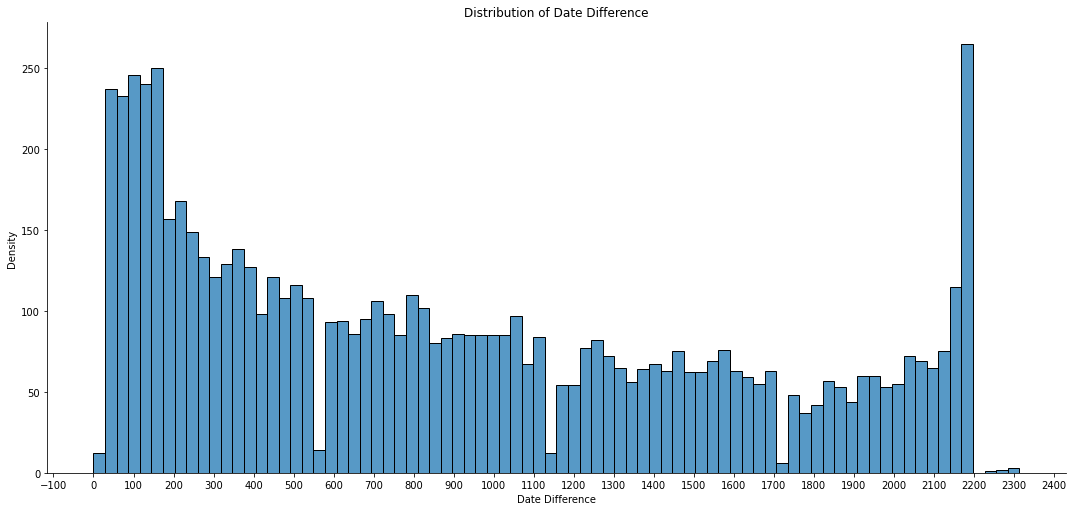

In [25]:
g = sns.displot(merged_df['date_diff'], bins=80, height=7, aspect=15/7)

plt.title('Distribution of Date Difference')
plt.xlabel('Date Difference')
plt.ylabel('Density')
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))
plt.show()

Распределение очень похоже на распределение по дате регистрации, но в обратном порядке. Чего нет в графике по дате регистрации так это сильных просадок по плотности почти каждые 2 года. Скорее всего это как-то связано с двухлетними контрактами. У меня нет идей.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Выделили признак длительности контракта - отлично!

In [26]:
merged_df['is_subscriber'] = merged_df.EndDate.isna().astype(int)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Целевой признак выделен верно.

In [27]:
merged_df = merged_df.drop(['BeginDate', 'EndDate', 'customerID'], axis=1)
merged_df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,date_diff,is_subscriber
0,Two year,Yes,Credit card (automatic),24.25,77.84,Female,0,Yes,No,NoService,NoService,NoService,NoService,NoService,NoService,NoService,Yes,92,0
1,Two year,Yes,Bank transfer (automatic),105.65,228.20,Female,0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,62,0
2,Two year,Yes,Bank transfer (automatic),93.05,677.40,Male,1,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,Yes,212,0
3,One year,No,Electronic check,104.10,637.09,Male,0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,183,0
4,Two year,Yes,Bank transfer (automatic),114.20,1281.32,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,335,0


В коде выше было создано 2 новых столбца, разница в днях между 1 января 2020 года и датой подписания договора, первая дата была выбрана исходя из того что это верхняя граница данных. По логике чем дольше клиент был в компании и соответственно чем больше количество дней в колонке, тем он лояльнее к компании. И вторая колонка бинарный классификатор является ли клиент активным подписчиком на услуги или он уже расторг договор, этот столбец теперь является целевым. Столбцы с датами были удалены что-бы не усложнять модель.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
С подготовкой данных порядок.

Посмотрим на данные

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  MultipleLines     7043 non-null   object 


In [29]:
# Столбцы is_subscriber и SeniorCititzen требуют конвертации
merged_df['SeniorCitizen'] = merged_df['SeniorCitizen'].astype('category')
merged_df['is_subscriber'] = merged_df['is_subscriber'].astype('category')

Проведём EDA

пропущенные значения
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
date_diff           0
is_subscriber       0
dtype: int64
Описательная статистика для числовых переменных
       MonthlyCharges  TotalCharges    date_diff
count     7043.000000   7043.000000  7043.000000
mean        64.761692   2115.312885   898.555729
std         30.090047   2112.742814   683.130510
min         18.250000      0.000000     0.000000
25%         35.500000    436.750000   276.000000
50%         70.350000   1343.350000   761.000000
75%         89.850000   3236.690000  1461.000000
max        118.750000   9221.380000  2314.000000


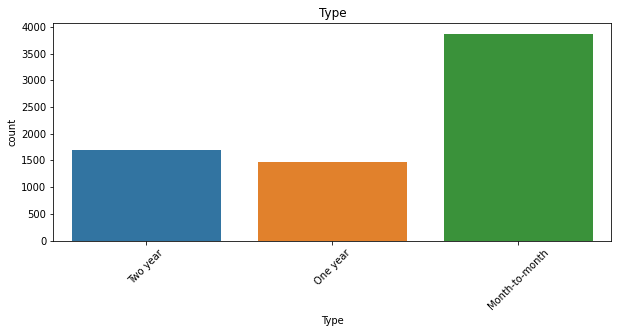

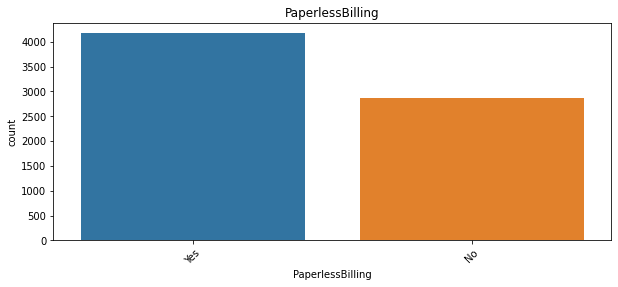

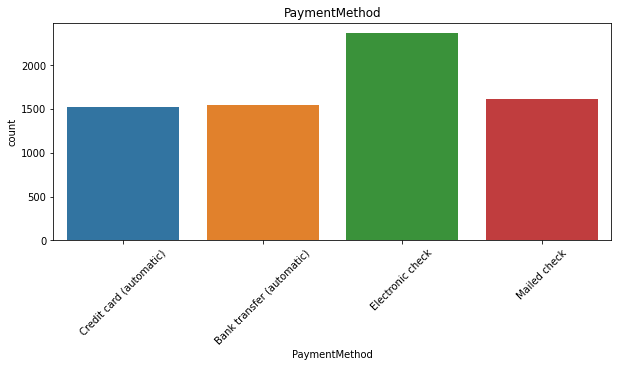

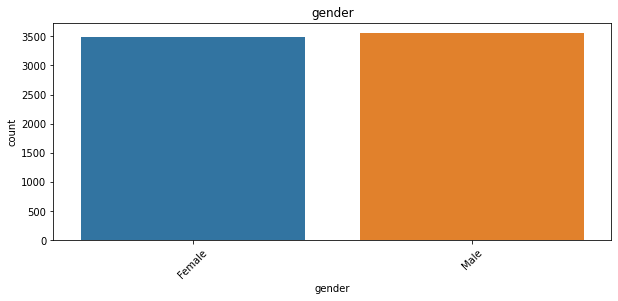

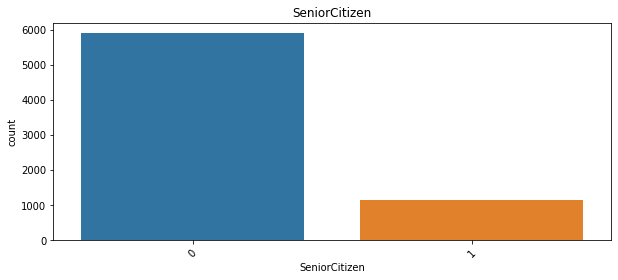

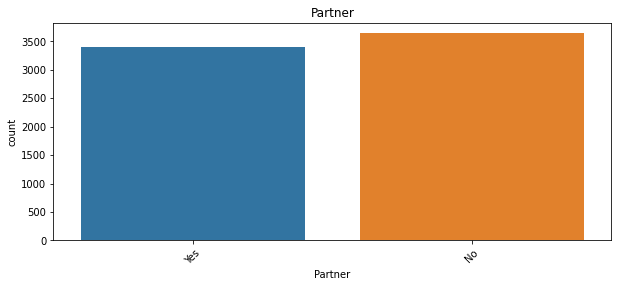

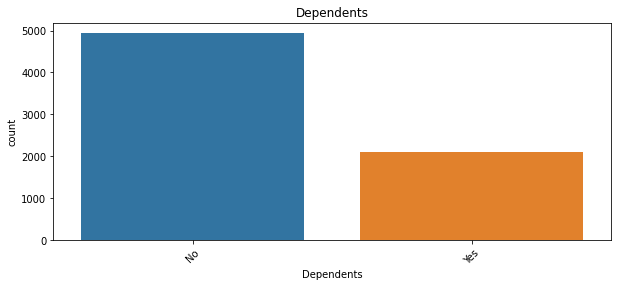

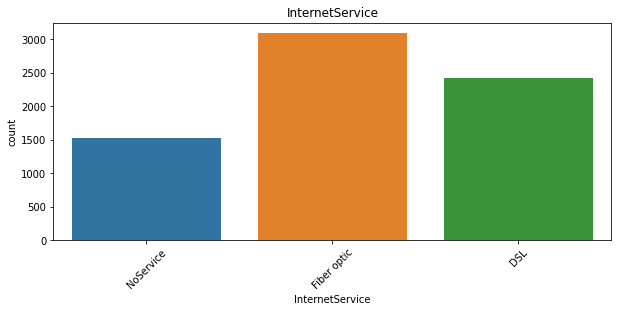

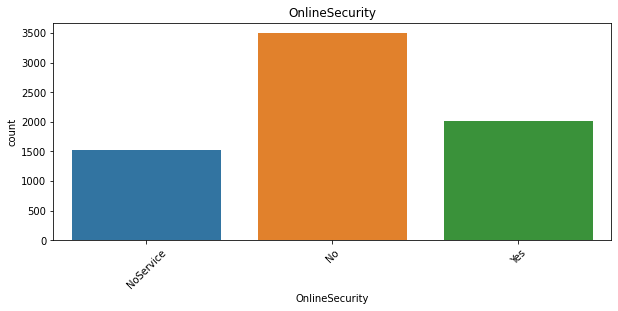

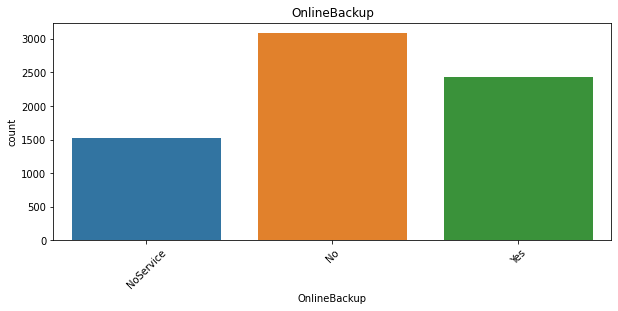

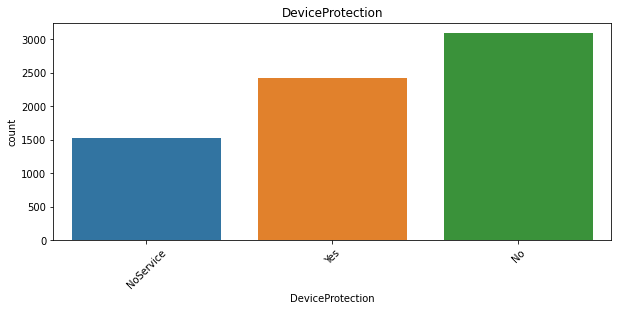

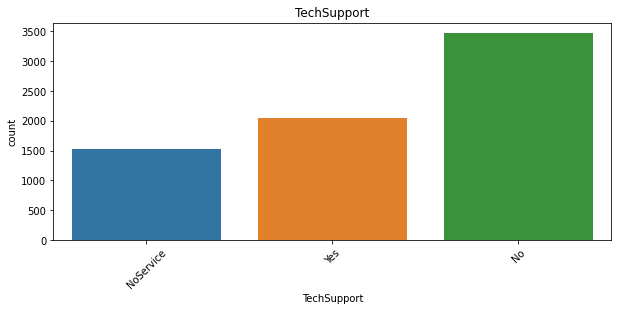

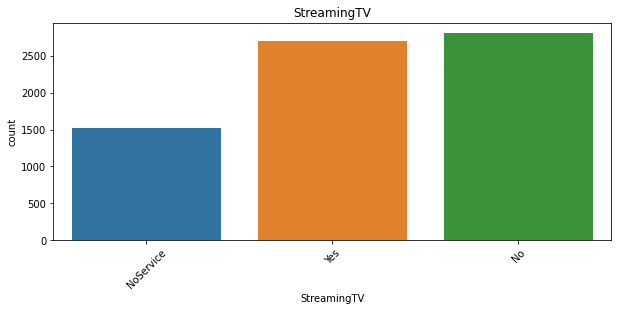

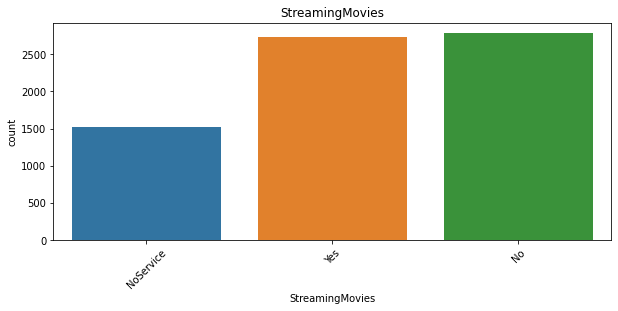

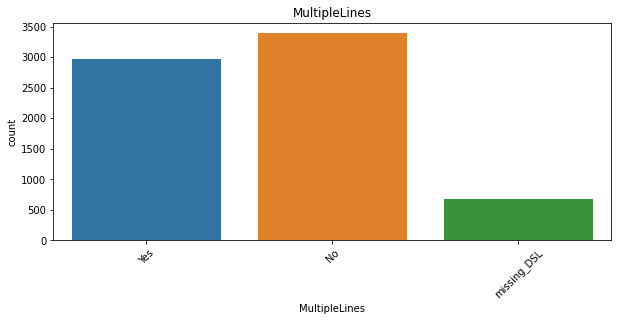

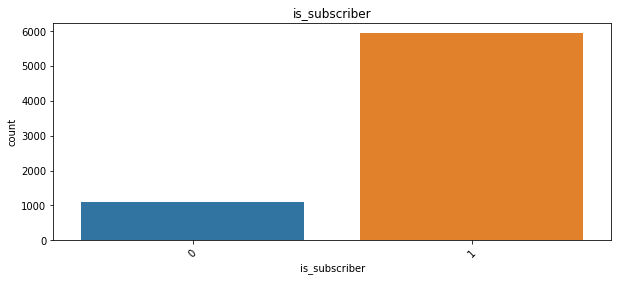

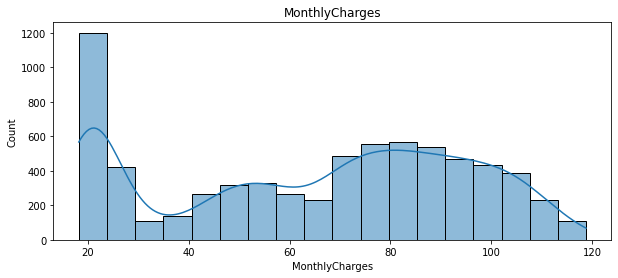

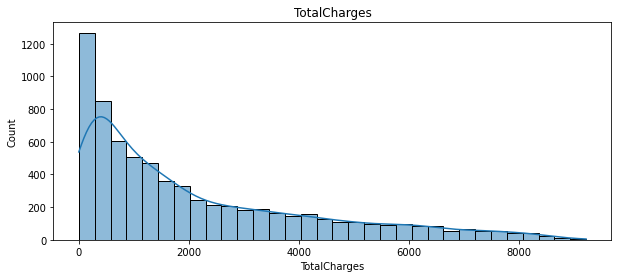

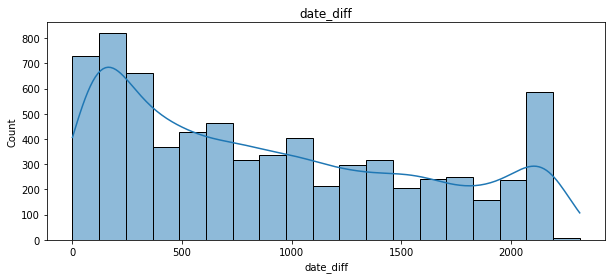

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'date_diff']


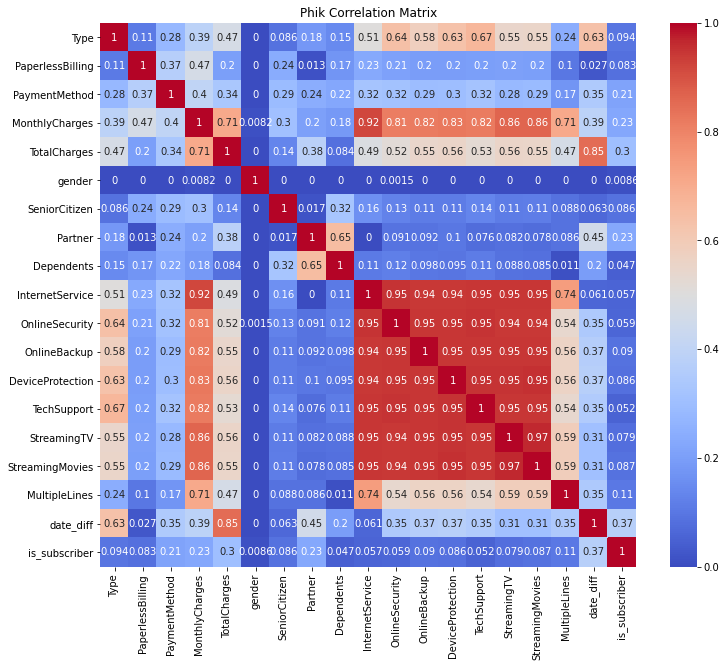

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Проверка на пропущенные значения
print("пропущенные значения")
print(merged_df.isnull().sum())

# Описательная статистика для числовых переменных
print("Описательная статистика для числовых переменных")
print(merged_df.describe())

# Функция для визуализации распределения категориальных переменных
def plot_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for column in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=df[column].astype(str))
        plt.title(column)
        plt.xticks(rotation=45)
        plt.show()
        
# Визуализация категориальных переменных
plot_categorical_columns(merged_df)

# Функция для визуализации распределения числовых переменных
def plot_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[column], kde=True)
        plt.title(column)
        plt.show()

# Визуализация числовых переменных
plot_numerical_columns(merged_df)

phik_matrix = merged_df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'date_diff'])

plt.figure(figsize=(12,10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Matrix')
plt.show()


## Подготовка данных

На этом этапе необходимо разбить данные на тренировочную и тестовую выборки, после чего закодировать категориальные признаки, нормализовать данные. Начнём с разделения на трейн и тест.

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              7043 non-null   object  
 1   PaperlessBilling  7043 non-null   object  
 2   PaymentMethod     7043 non-null   object  
 3   MonthlyCharges    7043 non-null   float64 
 4   TotalCharges      7043 non-null   float64 
 5   gender            7043 non-null   object  
 6   SeniorCitizen     7043 non-null   category
 7   Partner           7043 non-null   object  
 8   Dependents        7043 non-null   object  
 9   InternetService   7043 non-null   object  
 10  OnlineSecurity    7043 non-null   object  
 11  OnlineBackup      7043 non-null   object  
 12  DeviceProtection  7043 non-null   object  
 13  TechSupport       7043 non-null   object  
 14  StreamingTV       7043 non-null   object  
 15  StreamingMovies   7043 non-null   object  
 16  MultipleLines     7043 n

In [32]:
merged_df['is_subscriber'] = merged_df.is_subscriber.astype('category')
merged_df['SeniorCitizen'] = merged_df.SeniorCitizen.astype('category')

In [33]:
X = merged_df.drop('is_subscriber', axis=1)
y = merged_df['is_subscriber']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111223)

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
1. Использован неподходящий тип корреляции - нужно использовать `phik`, так как в данных есть дискретные/категориальные признаки.
    
2. Анализ нужно выполнять до трансформации, чтобы после кодирования/масштабирования не поменялись исходные зависимости в признаках.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, вынес в другой раздел
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сплитование выполнено корректно: пропорции выборок соблюдены, константа соответствует значению группы. 
    
Дополнительно можно попробовать стратифицировать выборки по целевому признаку - это позволит получить выборки с равынм соотноешнием классов, что может привести к увеличению качества твоего решения.

## Обучение моделей машинного обучения

Создадим два пайплайна для двух моделей. В общей части у пайплайнов поместим необходимые преобразования данных,  шкалирование и импутирование. Отличаться они будут по используемой модели, один будет работать на основе случайного леса, а второй на основе модели LightGBM. Оба пайплайна будут кросс-валидированы и проверены на различных параметрах. Лучшие модели будут выявлены при помощи статистики ROC-AUC.

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> `OneHotEncoder` полезно настраивать на бесперебойную работу при появлении в новых данных ранее неизвестных значений признаков: по умолчанию в таких случаях `OneHotEncoder` будет выбрасывать ошибку, однако для непрерывности процесса моделирования можно настроить параметр `handle_unknown='ignore'`, чтобы новые, ранее неизвестные значения игнорировались и не включались в итоговую матрицу.
        
То же касается `OrdinalEncoder`: по умолчанию в таких случаях `OrdinalEncoder` будет выбрасывать ошибку, однако для непрерывности процесса моделирования можно настроить параметры `handle_unknown='use_encoded_value'`, чтобы новые, ранее неизвестные значения кодировались константным значением, а в параметр `unknown_value` нужно передать само значение-константу. 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Спасибо, учту в дальнейшем.
</div>


<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных моделей и моделей на бустингах не стоит использовать `OneHotEncoder()` или его аналог `get_dummies()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Это хотел сегодня реализовать, но сижу за проектом уже с 11 часов, плюс вчера до поздней ночи, поэтому учту на будущее.
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Всё это нам не нужно: пропуски должны быть обработаны на этапе EDA после понимания бизнес-модели заказчика.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Удалил
</div>

<div class="alert alert-success">
<h2> Комментарий ментора v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

In [34]:
# RandomForest

# ВНИМАНИЕ, поскольку столбцов стало значительно больше, то уменьшим количество параметров
# Что-бы уложиться в разумные сроки на сервере
# param_grid_RF = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 10, 20, 30]
# }

param_grid_RF = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [10, 20, 30]
}


pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=111223))
])

cv_RF = ShuffleSplit(n_splits=5, test_size=0.2, random_state=111223)
grid_search_RF = GridSearchCV(pipeline_RF, param_grid_RF, cv=cv_RF,
                              scoring='roc_auc', n_jobs=-1, verbose=1)

grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=111223, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', '...
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MultipleLines'],
      dtype='object')),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         Index(['MonthlyCharges', 'TotalCharges', 'date_diff'], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=111223))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__n_estimators': [200, 300]},
             scoring='roc_auc', verbose=1)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект - так твоё решение будет более гибким и масштабируемым. 

In [35]:
# LightGBM

# param_grid_lgbm = {
#     'lgbm__num_leaves': [31, 50, 100],
#     'lgbm__learning_rate': [0.01, 0.1, 0.3],
#     'lgbm__n_estimators': [50, 100, 200]
# }
# Очень долгий фиттинг с кросс-валидацией, поэтому была
# создана усечённая вресия параметров ниже.
# ВНИМАНИЕ, поскольку столбцов стало значительно больше, то ещё раз уменьшим уменьшим количество параметров
# Что-бы уложиться в разумные сроки на сервере

param_grid_lgbm_slow_yandex = {
    'lgbm__num_leaves': [31, 50],
    'lgbm__learning_rate': [0.1, 0.3],
    'lgbm__n_estimators': [200]
}

pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('lgbm', LGBMClassifier(random_state=111223))
])

cv_lgbm = ShuffleSplit(n_splits=5, test_size=0.2, random_state=111223)
grid_search_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm_slow_yandex, cv=cv_lgbm, 
                                scoring='roc_auc', n_jobs=-1, verbose=1)

grid_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=111223, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', '...
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MultipleLines'],
      dtype='object')),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         Index(['MonthlyCharges', 'TotalCharges', 'date_diff'], dtype='object'))])),
                                       ('lgbm',
                                        LGBMClassifier(random_state=111223))]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.1, 0.3],
                         'lgbm__n_estimators': [200],
                         'lgbm__num_leaves': [31, 50]},
             scoring='roc_auc', verbose=1)

## Выбор лучшей модели

In [36]:
print("Best params RandomForest:", grid_search_RF.best_params_)
print("Best Score RandomForest:", grid_search_RF.best_score_)
print("Best params LightGBM:", grid_search_lgbm.best_params_)
print("Best Score LightGBM:", grid_search_lgbm.best_score_)

Best params RandomForest: {'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best Score RandomForest: 0.821153529628743
Best params LightGBM: {'lgbm__learning_rate': 0.1, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 31}
Best Score LightGBM: 0.8853993513152391


<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Найдена лучшая модель - отлично!

По результатам кросс валидации и подбора параметров лучше показала себя модель LightGBM c AUC ~ 0.87. Проверим как она поведёт себя на тестовой выборке.

In [37]:
best_model = grid_search_lgbm.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print('Accuracy', accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy 0.8949609652235628
ROC AUC: 0.8909466386399676


In [38]:
vc = y.value_counts()
vc.name = 'Подписчики'
vc.index = ['Абоненты (Количество)', 'Прервавшие договор (Количество)']
vc['Сумма'] = vc.sum()
vc

Абоненты (Количество)              5942
Прервавшие договор (Количество)    1101
Сумма                              7043
Name: Подписчики, dtype: int64

Значения статистики не сильно отличаются от того что мы получили на тренировочной выборке. 

Метрика "accuracy" (точность) в контексте машинного обучения показывает, насколько часто модель правильно предсказывает результат. Например, если у вас есть модель, которая предсказывает, будет ли клиент использовать кредитную карту, и она правильно предсказывает 90 случаев из 100, то её точность составляет 90%.

Однако у этой метрики есть недостатки, особенно в ситуациях, когда классы данных неравномерно распределены (например, 95% клиентов не используют кредитную карту и только 5% используют). В таком случае, модель может просто предсказывать, что никто не будет использовать карту, и всё равно показать высокую точность (95%), несмотря на то, что она не способна эффективно распознавать редкие случаи использования карты. Это может привести к принятию неверных бизнес-решений.

В нашем случае метрика accuracy показывает результат в 89.8%, соотношение классов примерно 6 к 1. То есть если бы модель всегда предсказывала что абонент остается с компанией accuracy бы равнялась 5942/7043 = 0.843 или 84.3%. Результат на первый взгляд не очень впечатляющий но на не сбалансированных выборках так всегда. Тем не менее наша модель справляется лучше абсурдной.


Оценим теперь какие параметры вносят наиболее весомый вклад в классификацию.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный результат работы модели.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для заказчика нужно интерпретировать, что показывает `Accuracy` при таком значении.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил про accuracy.
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Рассмотрим матрицу ошибок.

In [39]:
cm = confusion_matrix(y_test, y_pred)

print('true_negatives_abs :', true_negatives_abs  := cm[0, 0])
print('false_positives_abs:', false_positives_abs := cm[0, 1])
print('false_negatives_abs:', false_negatives_abs := cm[1, 0])
print('true_positives_abs :', true_positives_abs  := cm[1, 1])

true_negatives_abs : 112
false_positives_abs: 118
false_negatives_abs: 30
true_positives_abs : 1149


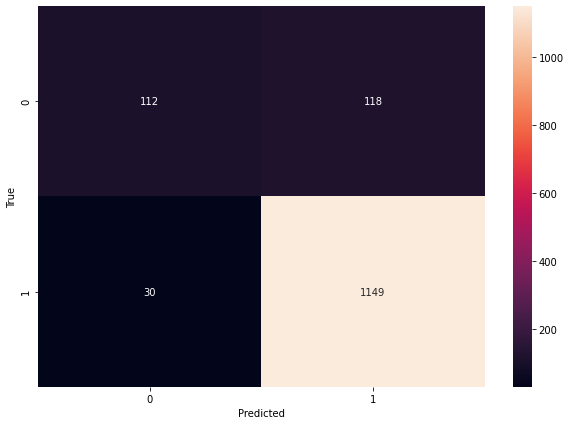

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

В абсолютных значениях матрица ошибок выглядит не плохо. Истинно-положительных значений на порядок больше чем всех остальных. Маловато конечно истинно-отрицательных результатов, для соотношения 6 к 1 в классах их должно быть побольше. Для упрощения анализа рассмотрим нормализованную матрицу ошибок.

In [41]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

print('true_negatives_rel :', true_negatives_rel  := cm[0, 0])
print('false_positives_rel:', false_positives_rel := cm[0, 1])
print('false_negatives_rel:', false_negatives_rel := cm[1, 0])
print('true_positives_rel :', true_positives_rel  := cm[1, 1])

true_negatives_rel : 0.48695652173913045
false_positives_rel: 0.5130434782608696
false_negatives_rel: 0.02544529262086514
true_positives_rel : 0.9745547073791349


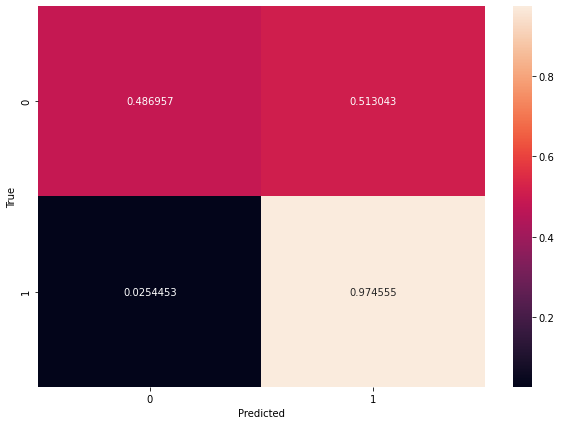

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Эта матрица выглядит более информативно. В целом мы предсказываем истинно отрицательный(человек ушел из компании) и ложно положительный(человек ушел, но мы говорим что остался) результаты в половине случаев. Случаев когда мы говорим что человек остался, но он на самом деле ушел практически нет, чуть более одного процента. И наконец для истинно положительных результатов(человек остался в компании) мы правы в 98.2 случаев.

In [43]:
# Поскольку с пайплайнами ШАП работать отказался, я решил попробовать натренировать модель заново.
model = LGBMClassifier(random_state=111223, learning_rate=0.3, n_estimators=200, num_leaves=31)
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_train_transformed = pd.DataFrame(X_train_transformed, 
                                   columns=list(preprocessor.get_feature_names_out()))
model.fit(X_train_transformed, y_train)
X_test_transformed = preprocessor.transform(X_test)

 99%|===================| 5588/5634 [00:38<00:00]        

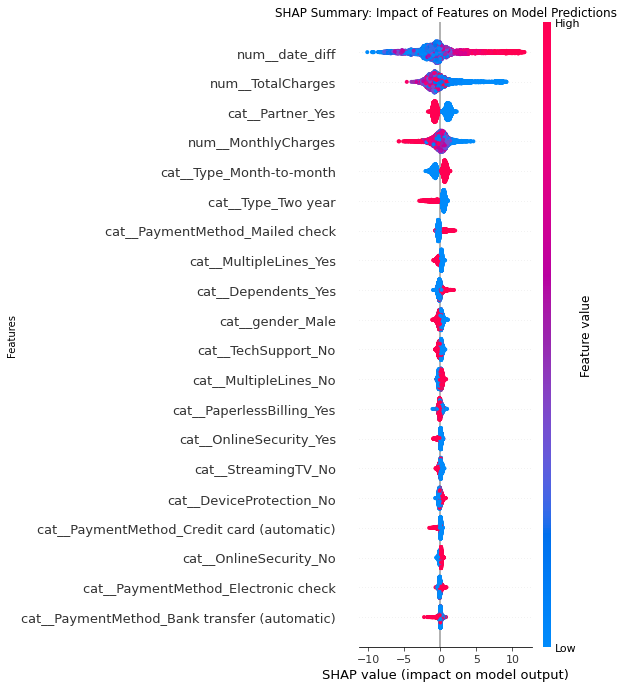

In [44]:
explainer = shap.TreeExplainer(model, X_train_transformed)
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed, show=False)
plt.title("SHAP Summary: Impact of Features on Model Predictions")
plt.ylabel("Features")
plt.show()

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь `SHAP` для анализа важности признаков.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
1. Не забудь подписать название и ось Y.
    
2. Нет анализа матрицы ошибок.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил оба пункта. Переработал вывод.
</div>


<div class="alert alert-success">
<h2> Комментарий ментора v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

## Общий вывод и рекомендации заказчику

В результате работы был произведён анализ пользовательских данных оператора связи "ТелеДом". Даные были предобработаны, проверены на дубли, очищены от артефактов и приведены к правильным типам данных. Также данные были охарактеризованы с частотной стороны, что помогло составить представление о наборе данных. После чего данные были объединены по полю customerID левым джоином от таблицы contract_new, что позволило получить примерно 7 тысяч строк после объединения.

Следующим этапом стало избавление от столбцов усложняющих работу с датасетом, тем не менее несущих полезную информацию. Это столбцы с датами заключения договора и его расторжения(если есть). На их основе было сделано два столбца, один показывает количество дней которые абонент провел с компанией, а второй является целевым и принимает значения 1/0 в зависимости от того является ли на данный момент клиент абонентом, или уже расторгнул договор. Его мы и предсказываем.

Также данные были перекодированы в 1/0 бинарный формат, шкалированы и импутированы методом К ближайших соседей по необходимости.

__Выводы для заказчика__: 

Точность модели составила 90 процентов, но к этой цифре надо относится с осторожностью поскольку у нас есть сильный дисбалланс классов между абонентами и ушедшими, примерно 6 к 1. Тем не менее с некоторой вероятностью мы можем предсказать когда человек соберётся расторгнуть договор так как значение accuracy полученное нами на 5% выше чем у абсурдной модели которая всегда предсказывает что клиент останется с компанией.

В целом мы предсказываем истинно отрицательный(человек ушел из компании) и ложно положительный(человек ушел, но мы говорим что остался) результаты в половине случаев. Случаев когда мы говорим что человек остался, но он на самом деле ушел практически нет, чуть более одного процента. И наконец для истинно положительных результатов(человек остался в компании) мы правы в 98.2 случаев.

Наиболее значимым признаком намерения расторгнуть количество дней в компании, чем дольше человек пользуется услугами компании тем вероятнее он расторгнет договор. Общие расходы также оказывают влияние на вероятность расторжения договора, как ни странно люди платящие максимальные и минимальные суммы не склонны разрывать договор, это делают в основном люди которые тратят чуть выше среднего. Странность также есть в том что абоненты с месячным расходом выше среднего не склонны разрывать договор, тогда как абоненты с низкими расходами в месяц наоборот. Люди с ежемесячным платежем гораздо чаще разрывают договор, по сравнению с другими типами.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть итоговый вывод - отлично!

<div style="border:solid Chocolate 2px; padding: 40px">

<b> Комментарий ментора: общий вывод по проекту </b>

Айдар, отличная работа на этом этапе - хорошо получилось исследовать несколько алгоритмов, оптимизировать гиперпараметры и найти оптимальную модель, которая привела к хорошему результату. Положительно хотел бы отметить использование `Pipeline` и `ColumnTransformer` для удобной работы с разными инструментами, а также `SHAP` для анализа важности признаков.
    
В любой работе есть точки роста - основные отмечены комментариями красного цвета и являются обязательными к использованию. Менее значительные отмечены зелёными (где сделано хорошо, но можно сделать лучше) и жёлтыми (где сделано не очень оптимально и что стоило бы улучшить уже сейчас) комментариями - их учёт опционален, но повысит общее качество работы.
    
Жду тебя на следующей итерации:)

<div style="border:solid Chocolate 2px; padding: 40px">

<b> Комментарий ментора: итоговый вывод по проекту </b>

Айдар, отличная работа над проектом - поздравляю с завершением финального спринта!
    
Проделана без сомнения классная работа: тебе удалось сделать проект высокого качества и решить довольно популярную боевую задачу классификации с дисбалансом классов на достаточно хорошем уровне - думаю, ты теперь без труда сможешь решать такие задачи в практической деятельности.
    
Из положительных моментов могу отметить следующее:
- чистый и понятный код, соответствие PEP8, последовательность и структурность работы - есть ощущение цельного и законченного исследования, несущего ценность для заказчика, что и является нашей конечной целью;
- попробованы разные модели, оптимизированы гиперпараметры, есть оценка на кросс-валидации - работа, которая не оставляет места для плохой метрики, очень основательный подход к решению задачи;
- для оптимизации гиперпараметров использован `GridSearchCV` - хороший выбор, так как многие выбирают по старинке - циклом и кросс-валидация. Здорово, что используешь автоматизированные инструменты, которые выполняют рабтоту эффективно;
- `pipeline` и `make_column_transformer`: ты отлично пользуешься энкодерам и упаковываешь их в удобный для работы конвейер - твоё решение будет удобно развёртывать в промышленной среде, масштабировать и адаптировать к изменениям внешней среды;
- `SHAP`: `SHAP`: базовый анализ важности признаков из `feature_importances_` позволяет оценить общий вклад признака в модель, но функционал `SHAP` позволяет оценить влияние признака на оба класса целевого признака, что также может стать источником новых вдохновений, рекомендацй и признаков - круто, что удалось применить в работе этот полезный инструмент.

    
Есть несколько рекомендаций об инструментах, которые не были использованы в проекте и которые хотел бы отметить:
- визуализация: `matplotlib` и `seaborn` покрывают базовую потребность в визуализации информации, однако рекомендую изучить библиотеку `plotly`: она рисует красивые и интерактивные графики, которые очень любит бизнес, и ценность твоих отчётов будет выше, если качество визуализации выйдет на новый уровень;
- оптимизация гиперпараметров: `GridSearchCV` и аналоги всё ещё в ходу и пока не сдают позиции, но сейчас довольно популярны алгоритмы оптимизации вроде `Optuna` или `Hyperopt` - более интеллектуальные, чем простой перебор, и работают быстрее иной раз. Рекомендую разобраться в них и начать применять в практической деятельности;
- матрица ошибок: этим инструментом стоит научиться пользоваться более уверенно, научиться видеть связь этих метрик с бизнесом и применять в работе над реальными проектами, так как он позволяет бизнесу оценивать потенциальный эффект от внедрения модели в работу. `True Positive` и `True Negative` - это полезные метрики для бизнеса, определяющие ценность модели для их процессов, но `False Positive` и `False Negative` - это уязвимые места твоей модели и риски для процессов, так как они могут формировать убытки для компании, нерентабельные затраты и другие негативные факторы. Поэтому уделять внимание стоит не только правильным ответам, но и ошибкам, чтобы получить компексную оценку модели, в том числе её слабых мест;
- отбор признаков: хорошо анализировать важность признаков, но чем меньше признаков будет в итоговом наборе, тем быстрее модель будет учиться, также это может привести к росту метрики (не всегда, но бывает периодически 😁). Для отбора признаков можно использовать корреляцию, результаты исследования важности признаков итоговой модели и последующую новую итерацию обучения-тестирования, а также инструменты отбора признаков `feature_selection` у `sklearn`: https://scikit-learn.org/stable/modules/feature_selection.html. Их, кстати, можно делать частью `pipeline` - твои конвейеры будут ещё лучше;
- EDA: не стоит ограничиваться базовым анализом распределений признака, в том числе делать `barplot()` в разрезе оттока - в задачах дисбаланса классов такой EDA неэффективен. Большую ценность представляет анализ, направленный на понимание портрета клиента, значений категориальных признаков, влияющих на отток в большей или меньшей степени, а также интервалы непрерывных признаков, на которых отток выше, чем сохранение клиентов - понимание таких узких зон работы компании позволит лучше подготовить пространство признаков для модели и дать заказчику рекомеднации по оптимизации его работы.
    
Если планируешь размещать работу в портфолио - ты можешь учесть рекомендации выше в работе самостоятельно, удалить наши комментарии и сделать очень презентабельное решение для демонстрации полученных навыков. Лучше это сделать в ближайшее время, пока все нюансы еще отложились в памяти.
    
Также дам пару рекомендаций в целом о дальнейшей карьере:
- табличные данные и классический ML - это интересно, но постепенно отходит на второй план по мере роста популярности нейронных сетей и глубокого обучения. Поэтому рекомендую активно в них погружаться, выбрать близкую душе специализацию (CV или NLP) и осваивать её;
- Python - must have: важно не только хорошо уметь работать с алгоримами машинного обучения, но и деплоить решения, настраивать пайплайны и миграции, писать качественный, чистый и отказоустойчивый код, чтобы быть хорошим ML инженером - это тоже очень важный аспект деятельности дата сайентиста, поэтому тут тоже очень больше поле для деятельности;
- облачные технологии: сейчас всё меньше заказчиков работают на собственных мощностях, отдавая предпочтения облачной инфраструктуре: она проще в обслуживании и масштабировании и позволяет экономить на железе. Сейчас многие технологические гиганты типа Amazon, Microsoft и др. имеют собственные облачные решения, которые они продают как продукты - хорошее понимание облачных технологий будет твоим сильным конкурентным преимуществом. На сайтах этих компаний много обучающих курсов, рекомендую уделить этому внимание.
    
Спасибо за отличную работу над проектом, желаю продуктивного дальнейшего развития и лёгкого трудоустройства, если актуально:)